In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("hmeq.csv")

In [3]:
df.size

77480

In [4]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [5]:
df.rename(columns={'BAD':'TARGET'},inplace=True)

In [6]:
df.head()

,TARGET,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TARGET   5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [8]:
df.describe()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [9]:
# Distribution of features

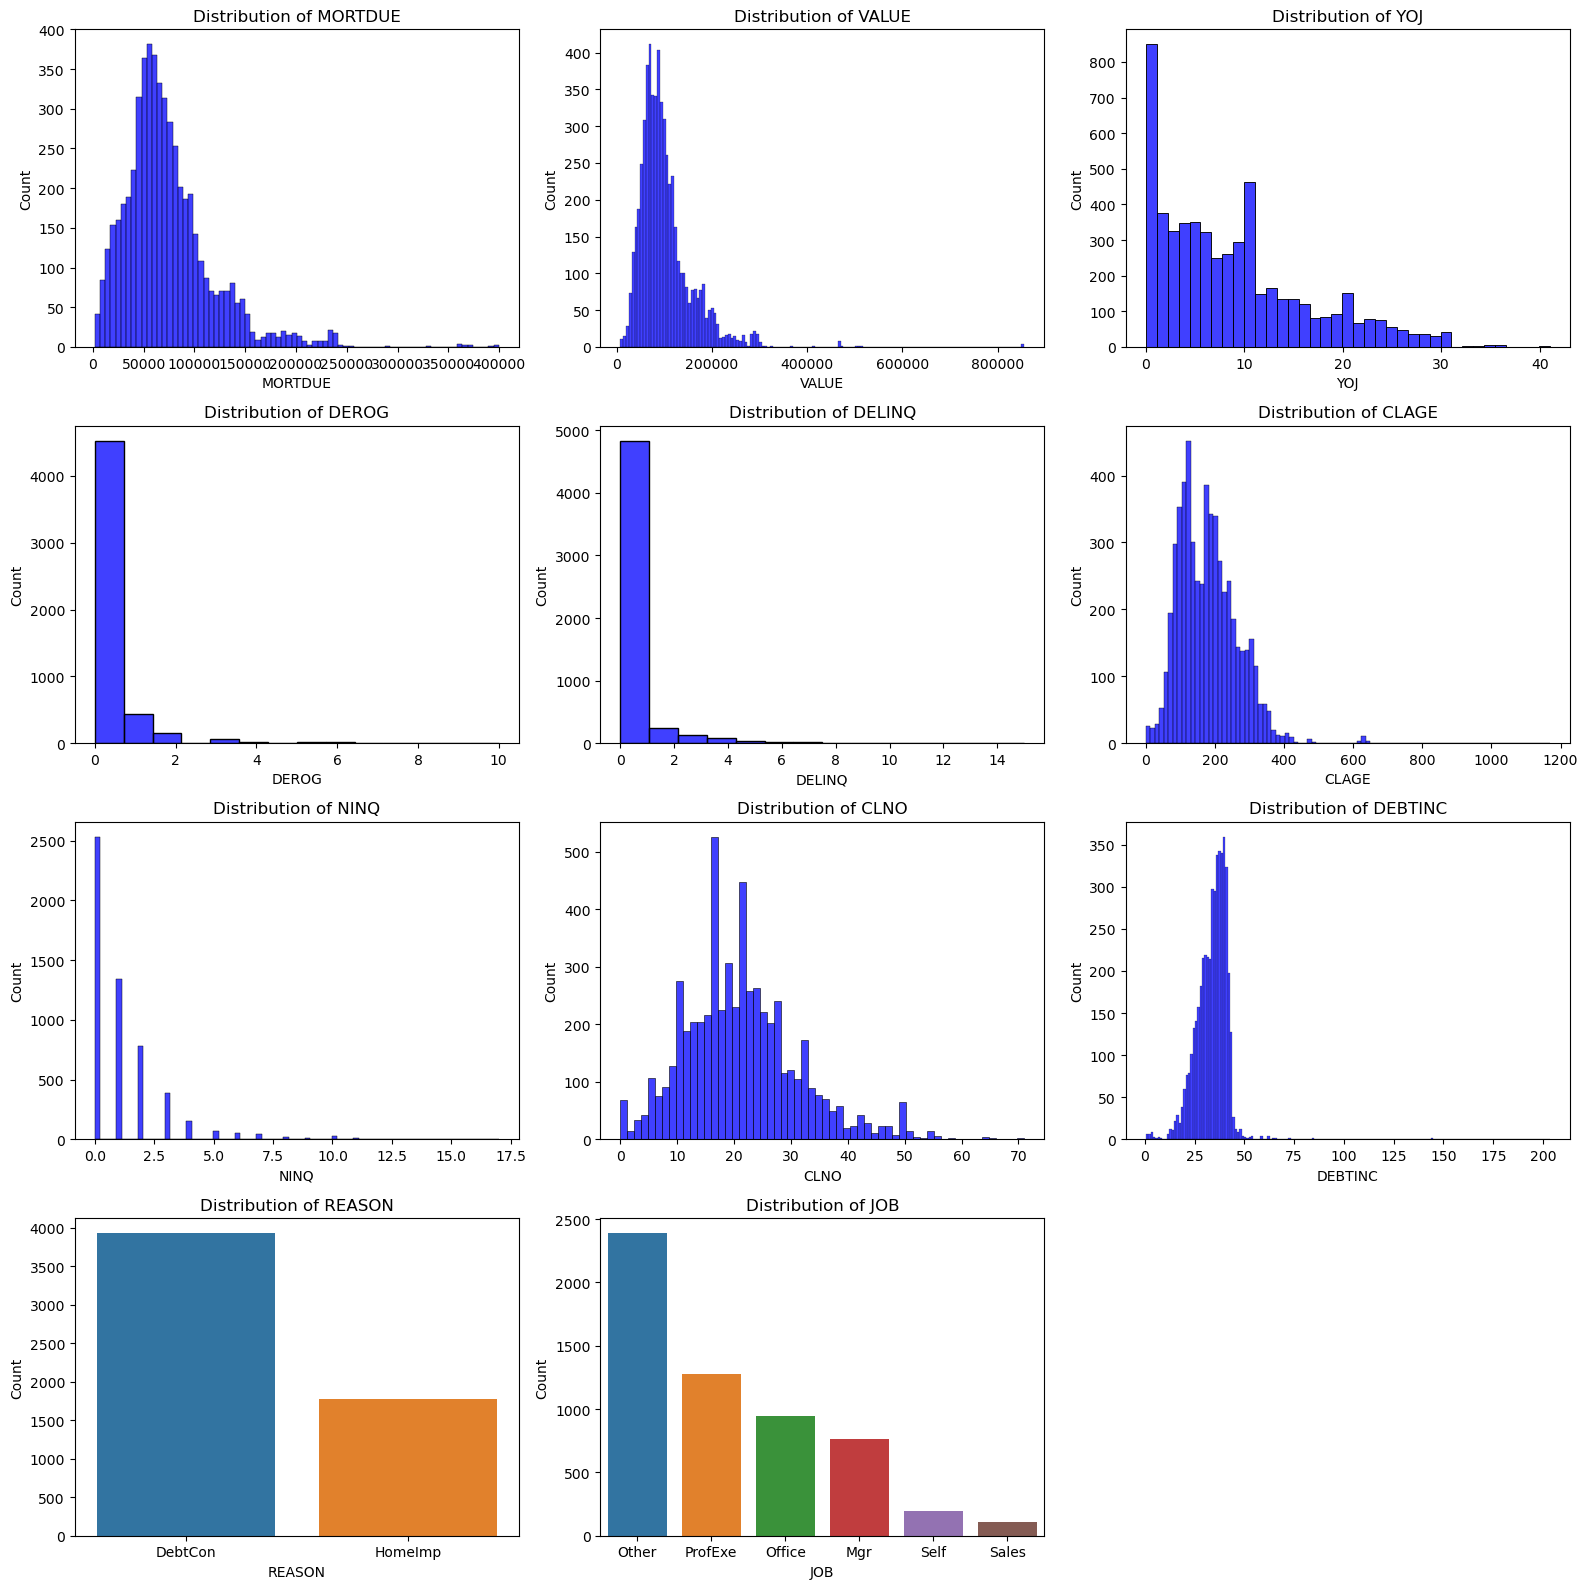

In [10]:
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=['float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Define the number of rows and columns for subplots
total_features = len(numerical_features) + len(categorical_features)
ncols = 3  # Number of columns
nrows = (total_features // ncols) + (total_features % ncols > 0)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, nrows * 4))
axes = axes.flatten()  # Flatten to easily index each subplot

# Plot numerical features
for i, col in enumerate(numerical_features):
    sns.histplot(df[col], ax=axes[i], color='blue')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel('Count')

# Plot categorical features
for i, col in enumerate(categorical_features, start=len(numerical_features)):
    value_counts = df[col].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], hue=value_counts.index)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel('Count')

# Turn off empty subplots
for j in range(len(numerical_features) + len(categorical_features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [11]:
# plotting boxplots of the features

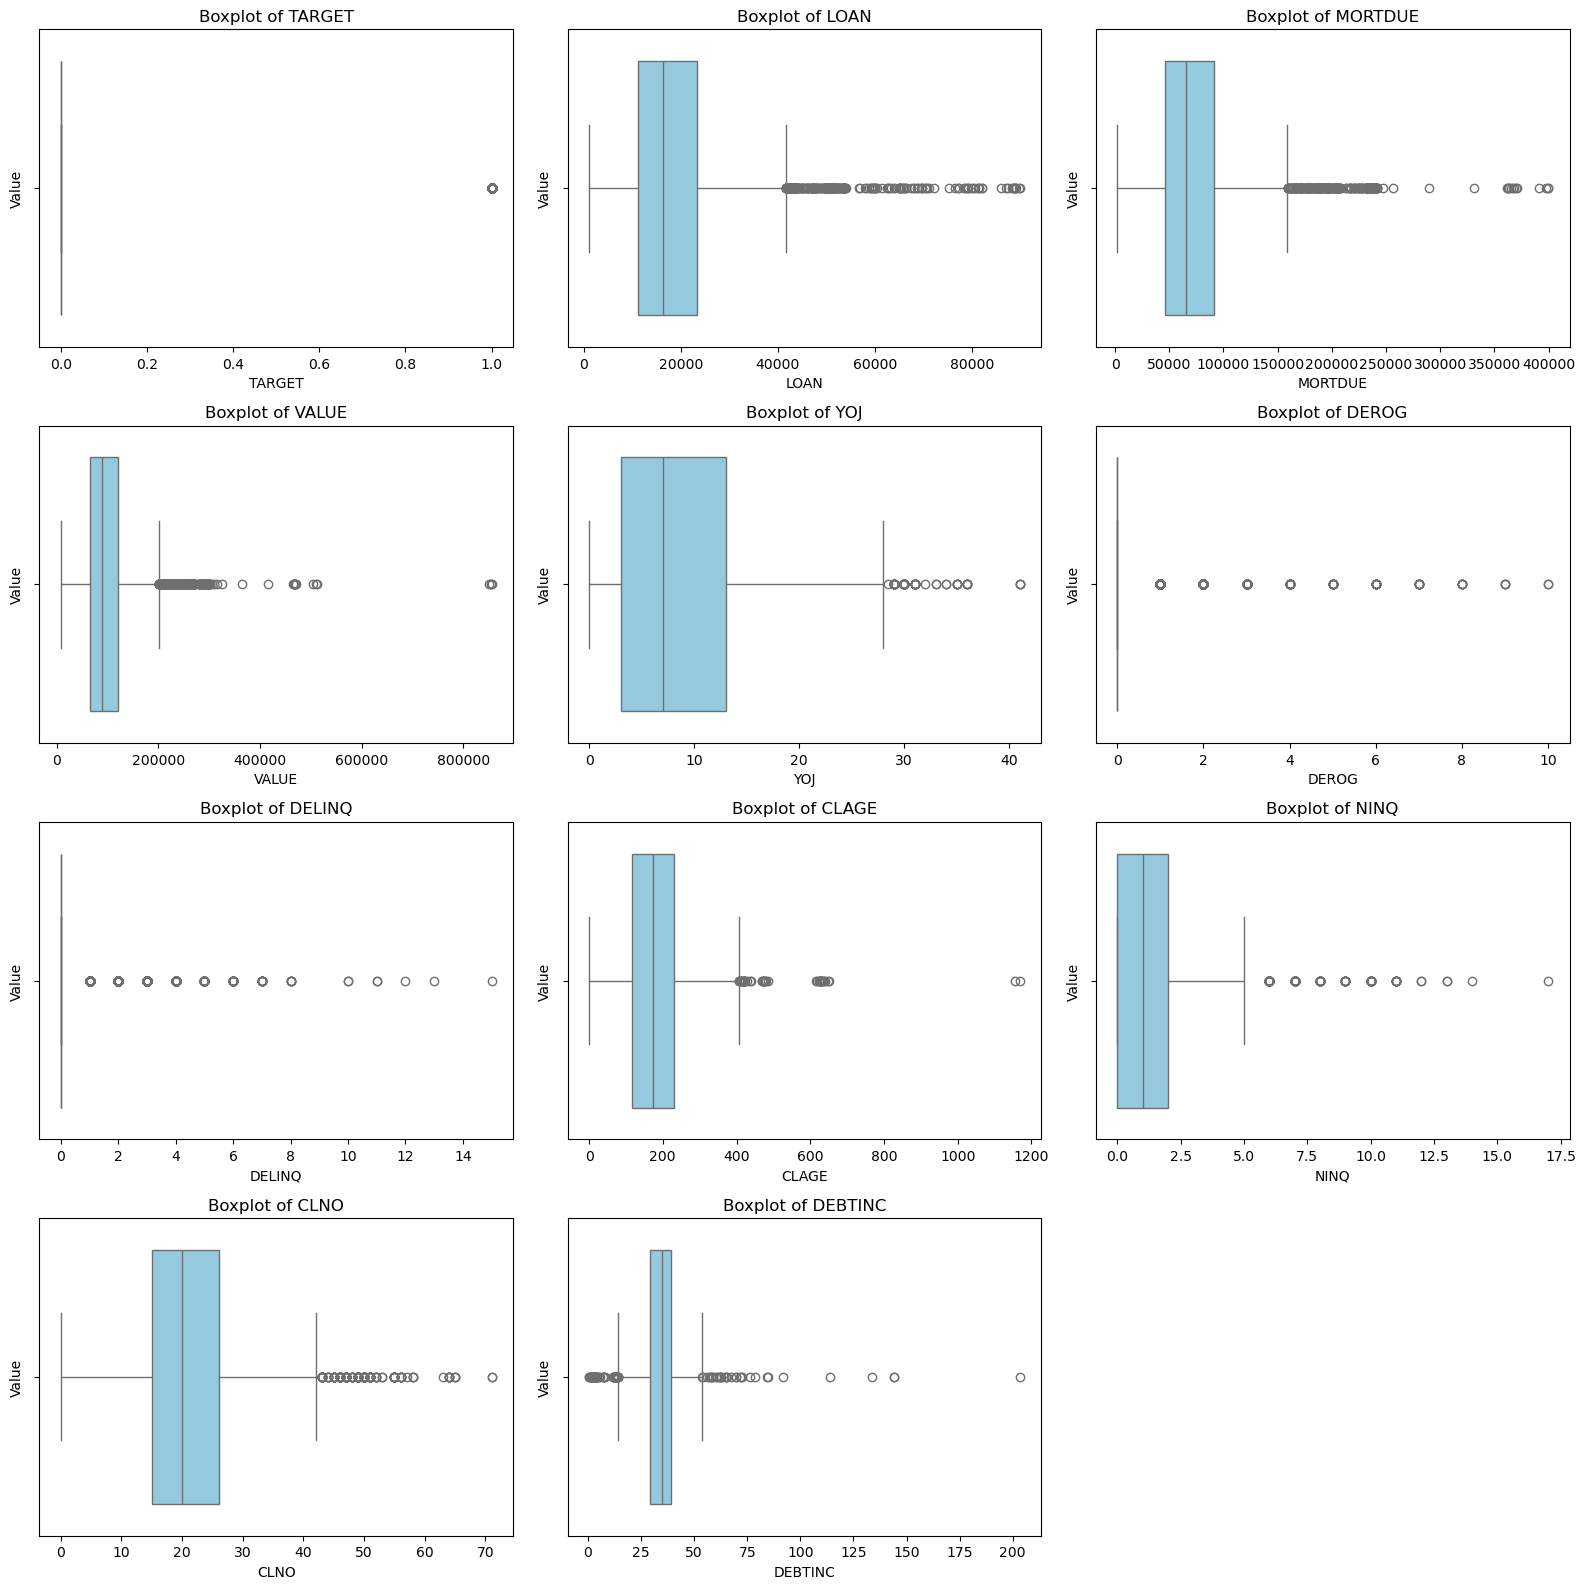

In [12]:
# Identify numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Define the number of rows and columns for subplots
ncols = 3  # Number of columns
nrows = (len(numerical_features) // ncols) + (len(numerical_features) % ncols > 0)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, nrows * 4))
axes = axes.flatten()  # Flatten to easily index each subplot

# Plot boxplots for numerical features
for i, col in enumerate(numerical_features):
    sns.boxplot(data=df, x=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_ylabel('Value')

# Turn off empty subplots
for j in range(len(numerical_features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Missing Values Handling

In [14]:
df.isnull().sum()

TARGET        0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [15]:
# Function for calculating percentage of missing values
def percent_missing(df):
    percent_nan = (100 * df.isnull().sum())/len(df)
    percent_nan = percent_nan[percent_nan > 0 ].sort_values()
    return percent_nan

In [16]:
percent_missing(df)

VALUE       1.879195
CLNO        3.724832
REASON      4.228188
JOB         4.681208
CLAGE       5.167785
NINQ        8.557047
YOJ         8.640940
MORTDUE     8.691275
DELINQ      9.731544
DEROG      11.879195
DEBTINC    21.258389
dtype: float64

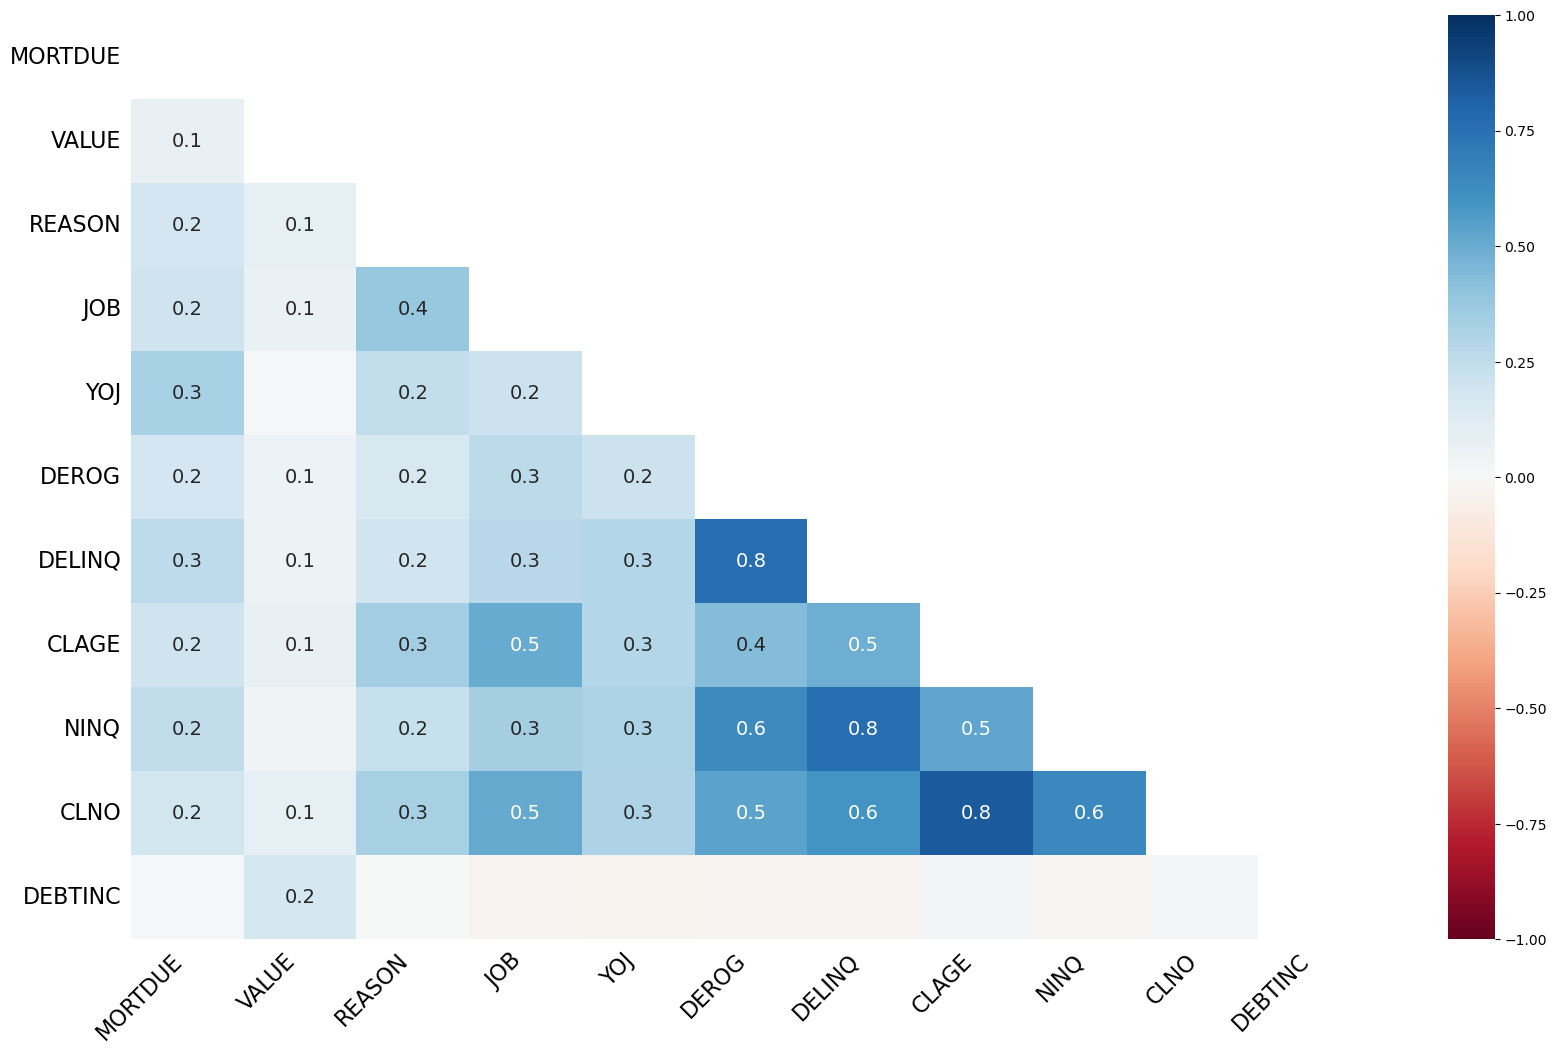

In [17]:
msno.heatmap(df)
plt.show()

In [18]:
# JOB 
df['JOB'].unique()

array(['Other', nan, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

In [19]:
df['JOB'].mode()

0    Other
Name: JOB, dtype: object

In [20]:
df['JOB'] = df['JOB'].fillna('Other')  # mode('Other') imputation 

In [21]:
# REASON 
df['REASON'].unique()

array(['HomeImp', nan, 'DebtCon'], dtype=object)

In [22]:
df['REASON'].mode()

0    DebtCon
Name: REASON, dtype: object

In [23]:
df['REASON'] = df['REASON'].fillna('DebtCon') # mode imputation

In [24]:
# DEROG, DELINQ & NINQ (mode imputation)
df['DEROG'] = df['DEROG'].fillna(df['DEROG'].mode()[0])
df['DELINQ'] = df['DELINQ'].fillna(df['DELINQ'].mode()[0])
df['NINQ'] = df['NINQ'].fillna(df['NINQ'].mode()[0])

In [25]:
percent_missing(df)

VALUE       1.879195
CLNO        3.724832
CLAGE       5.167785
YOJ         8.640940
MORTDUE     8.691275
DEBTINC    21.258389
dtype: float64

In [26]:
# Checking for duplicated rows
df.duplicated().sum()   # no duplicated rows

0

Possible Issues:
Mode vs Histogram Bins:
Pandas mode() returns the most frequent exact values, which may not match the peak of the histogram if the data is continuous or grouped into bins.
Histograms represent frequency across ranges of values (bins), while the mode() function works with exact values.
Binning Effects: The mode visible in the histogram is influenced by how the data is binned. The visual "mode" might appear at the center of a bin range, but data.mode() calculates the most frequent exact values, which can differ.

In [28]:
df['CLAGE'] = df['CLAGE'].fillna(df['CLAGE'].median())
df['MORTDUE'] = df['MORTDUE'].fillna(df['MORTDUE'].median())
df['VALUE'] = df['VALUE'].fillna(df['VALUE'].median())
df['YOJ'] = df['YOJ'].fillna(df['YOJ'].median())
df['DEBTINC'] = df['DEBTINC'].fillna(df['DEBTINC'].median())

In [29]:
df['CLNO'] = df['CLNO'].fillna(df['CLNO'].mean()) # mean imputation

In [31]:
# Encoding

In [32]:
# object columns
my_object_df = df.select_dtypes(include='object')

# Numeric columns
my_numeric_df = df.select_dtypes(exclude='object')

In [33]:
df_objects_dummies = pd.get_dummies(my_object_df,drop_first=True,dtype='int')

In [34]:
df_objects_dummies

,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,0,1,0,0,0
1,1,0,1,0,0,0
2,1,0,1,0,0,0
3,0,0,1,0,0,0
4,1,1,0,0,0,0
...,...,...,...,...,...,...
5955,0,0,1,0,0,0
5956,0,0,1,0,0,0
5957,0,0,1,0,0,0
5958,0,0,1,0,0,0


In [35]:
# concatinating two df's
final_df = pd.concat([my_numeric_df,df_objects_dummies],axis=1)

In [36]:
final_df

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.000000,34.818262,1,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.000000,34.818262,1,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.000000,34.818262,1,0,1,0,0,0
3,1,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,0.0,21.296096,34.818262,0,0,1,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.000000,34.818262,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.000000,36.112347,0,0,1,0,0,0
5956,0,89000,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.000000,35.859971,0,0,1,0,0,0
5957,0,89200,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.000000,35.556590,0,0,1,0,0,0
5958,0,89800,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.000000,34.340882,0,0,1,0,0,0


In [37]:
# Checking the dataset is balanced or imbalanced

In [38]:
df['TARGET'].value_counts() 

TARGET
0    4771
1    1189
Name: count, dtype: int64

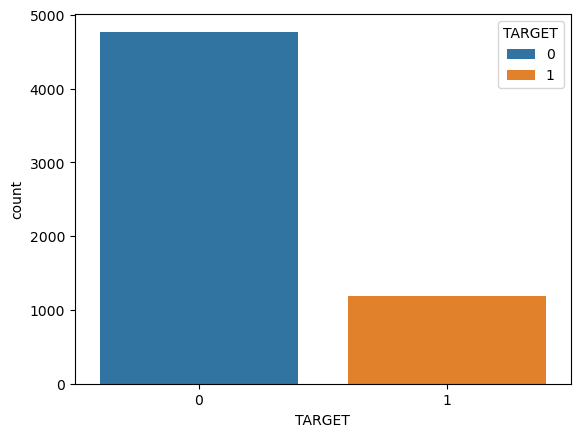

In [39]:
sns.countplot(x='TARGET', data=final_df, hue='TARGET')
plt.show()

In [40]:
# dataset is imbalaced

In [41]:
# Upsampling
df_minority = final_df[final_df['TARGET']==1]
df_majority = final_df[final_df['TARGET']==0]

In [42]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

In [43]:
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

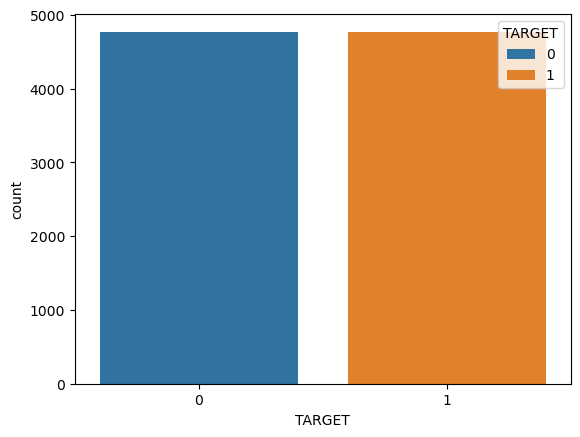

In [44]:
sns.countplot(x='TARGET', data=df_upsampled, hue='TARGET')
plt.show()

In [45]:
# Downsampling
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [46]:
df_downsampled = pd.concat([df_minority,df_majority_downsampled])

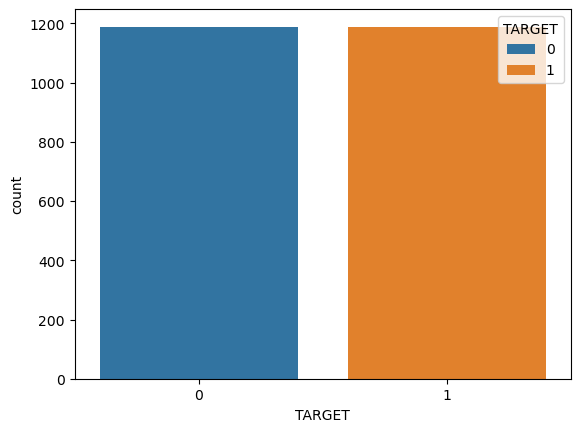

In [47]:
sns.countplot(x='TARGET', data=df_downsampled, hue='TARGET')
plt.show()

In [48]:
# SMOTE

In [49]:
oversample = SMOTE()
X,y = oversample.fit_resample(final_df[['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC', 'REASON_HomeImp', 'JOB_Office', 'JOB_Other',
       'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']],final_df['TARGET'])

In [51]:
df_SMOTE = pd.concat([X,y],axis=1)

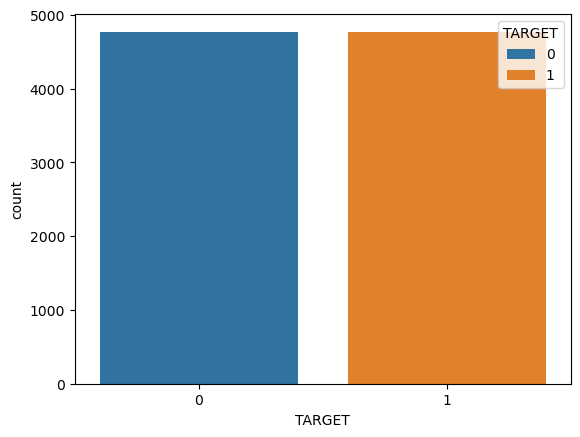

In [102]:
sns.countplot(x='TARGET', data=df_SMOTE, hue='TARGET')
plt.show()

In [104]:
df_upsampled.to_csv('hmeq_upsampled.csv',index=False)
df_downsampled.to_csv('hmeq_downsampled.csv',index=False)
df_SMOTE.to_csv('hmeq_SMOTE.csv',index=False)